

# Homework

---
Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.


##Q1.
I want to calculate Pr(Pass|Quick).
Starting by calculating Pr(Quick) by the Total Law of Probability:

\begin{align*}
\ p(Quick) &={} p(Quick | Pass)p(Pass) + p(Quick | Fail)p(Fail)\\
\ &={} 0.6 * 0.9 + 0.3 * 0.1 = 0.57 \\
\end{align*}

Then by Bayes Formula:

\begin{align*}
\ p(Pass|Quick) &={} \frac{p(Quick|Pass)*p(Pass)}{p(Quick)} \\
\ &={} \frac{0.6*0.9}{0.57} = 0.9474
\end{align*}

So we can expect that approximately 94.74% of students who answer this question quickly will pass this class.

## Q2: Posterior of a Multinomial–Dirichlet Model

Given:
- **Likelihood**: $$p(x \mid \theta, n) = \mathrm{Multinomial}(n, \theta)$$
- **Prior**: $$p(\theta \mid \boldsymbol{\alpha}) = \mathrm{Dirichlet}(\boldsymbol{\alpha})$$



By Bayes’ theorem:

$$
  p(\theta \mid x, n, \boldsymbol{\alpha})
  \;=\;
  \frac{p(x \mid \theta, n)\,p(\theta \mid \boldsymbol{\alpha})}{p(x \mid n, \boldsymbol{\alpha})}.
$$

Since $$p(x \mid n, \boldsymbol{\alpha})$$ is just a normalizing constant (with respect to $$\theta$$), we can write:

$$
  p(\theta \mid x, n, \boldsymbol{\alpha})
  \;\propto\;
  p(x \mid \theta, n)\;p(\theta \mid \boldsymbol{\alpha}).
$$


$$
  p(x \mid \theta, n)
  \;=\;
  \frac{n!}{x_1!\,\cdots\,x_k!}\,
  \theta_1^{\,x_1} \cdots \theta_k^{\,x_k},
$$

$$
  p(\theta \mid \boldsymbol{\alpha})
  \;=\;
  \frac{1}{B(\boldsymbol{\alpha})}
  \,\prod_{j=1}^k
    \theta_j^{\,\alpha_j - 1}.
$$

Multiplying:

$$
\begin{aligned}
  p(x \mid \theta, n)\,p(\theta \mid \boldsymbol{\alpha})
  &=
  \left(\frac{n!}{x_1!\,\cdots\,x_k!}\right)
  \left(\frac{1}{B(\boldsymbol{\alpha})}\right)
  \left(\prod_{j=1}^k \theta_j^{x_j}\right)
  \left(\prod_{j=1}^k \theta_j^{\alpha_j - 1}\right)
  \\[6pt]
  &=
  \left(\frac{n!}{x_1!\,\cdots\,x_k!}\right)
  \left(\frac{1}{B(\boldsymbol{\alpha})}\right)
  \prod_{j=1}^k
    \theta_j^{x_j + \alpha_j - 1}.
\end{aligned}
$$

Here,
$$\frac{n!}{x_1!\,\cdots\,x_k!}$$
and
$$\frac{1}{B(\boldsymbol{\alpha})}$$
are constants with respect to $$\theta$$.  
Thus:

$$
  p(x \mid \theta, n)\,p(\theta \mid \boldsymbol{\alpha})
  \;\propto\;
  \prod_{j=1}^k \theta_j^{(\alpha_j + x_j) - 1}.
$$


We see:

$$
  p(\theta \mid x, n, \boldsymbol{\alpha})
  \;\propto\;
  \prod_{j=1}^k \theta_j^{(\alpha_j + x_j) - 1}.
$$

This is exactly the kernel of a Dirichlet distribution with parameters
$$\alpha_j + x_j$$. Therefore, the posterior is:

$$
  p(\theta \mid x, n, \boldsymbol{\alpha})
  =
  \mathrm{Dirichlet}\bigl(\alpha_1 + x_1,\;\dots,\;\alpha_k + x_k\bigr).
$$

1. What is the Posterior Distribution?
   A Dirichlet distribution.

2. What is its Parameterization?
   $$
       \mathrm{Dirichlet}\bigl(\alpha_1 + x_1,\;\dots,\;\alpha_k + x_k\bigr).
   $$


True multinomial parameters (p_true): [0.3 0.5 0.2]
Number of trials (n): 100
Sample counts (x): [34 49 17]   (sums to n)


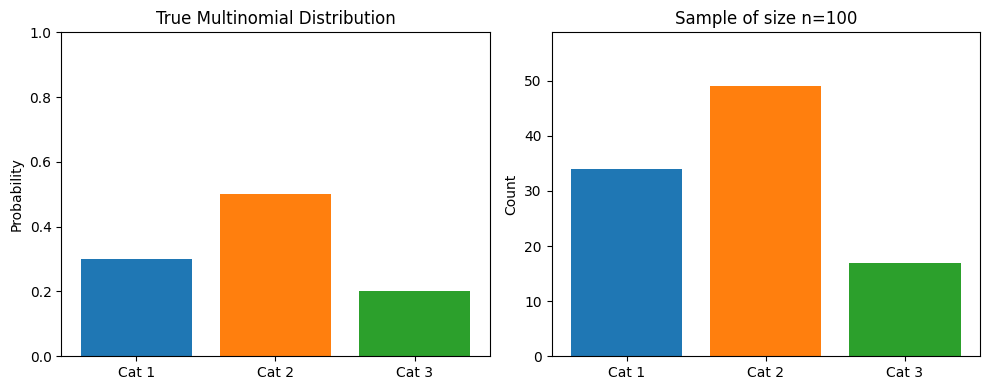

In [5]:
import numpy as np
import matplotlib.pyplot as plt

p_true = np.array([0.3, 0.5, 0.2])
n = 100

sample = np.random.multinomial(n, p_true, size=1)[0]


print("True multinomial parameters (p_true):", p_true)
print("Number of trials (n):", n)
print("Sample counts (x):", sample, "  (sums to n)")

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].bar(["Cat 1", "Cat 2", "Cat 3"], p_true, color=["C0", "C1", "C2"])
axs[0].set_ylim(0, 1)
axs[0].set_ylabel("Probability")
axs[0].set_title("True Multinomial Distribution")


axs[1].bar(["Cat 1", "Cat 2", "Cat 3"], sample, color=["C0", "C1", "C2"])
axs[1].set_ylim(0, max(sample)*1.2)
axs[1].set_ylabel("Count")
axs[1].set_title(f"Sample of size n={n}")

plt.tight_layout()
plt.show()
